In [1]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt
import modsim.models.mach_zehnder as mzm
from modsim.signal_gen.arbitrary_generator import SignalGen
%matplotlib inline

In [2]:
# instantiating signal generation
awg = SignalGen(num_of_samples = 256*1024, sampling_time = 25e-5, samples_per_symbol = 4)

# Mach-Zehnder Transfer Functions with heaters

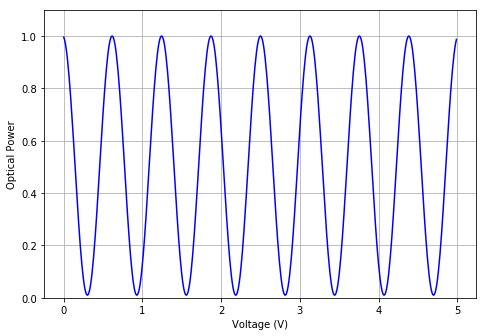

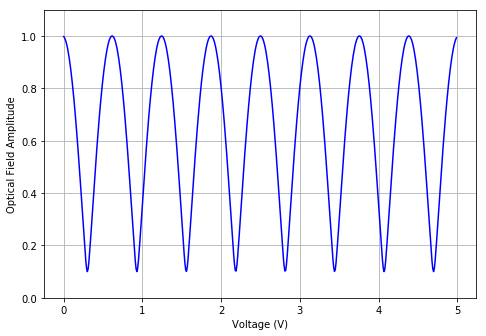

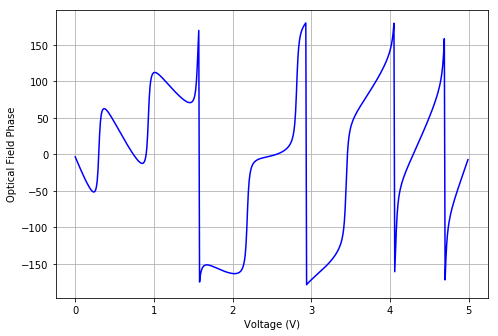

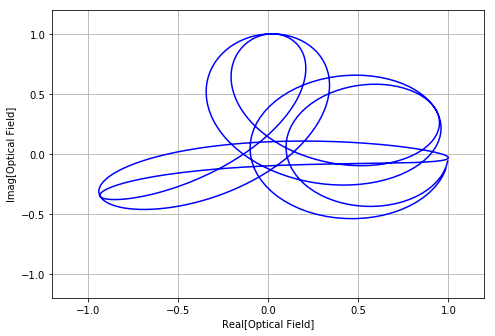

In [10]:
# MZM definitions
Ein = 1
Vrf_1 = 0
Vrf_2 = 0

# heater driving definitions
Vcc = 5
Vheat = np.arange(0, 5, 0.01)
R = 1
push_pull = True
pre_sqrt = False

# square-root before applying voltage
if pre_sqrt:
    V_ = np.sqrt(Vheat)
    V = (Vcc / np.max(V_)) * V_
else:
    V = Vheat

# single heater vs. dual drive push-pull
if push_pull:                
    Iheat_1 = (Vcc - V) / R
    Iheat_2 = V / R
else:            
    Iheat_1 = V / R
    Iheat_2 = 0
    
# modulating w/ infinite ER
Eout = mzm.lin_with_heaters(Ein, 
                           Vrf_1,
                           Vrf_2,
                           Iheat_1,
                           Iheat_2,
                           ER_model = 'Finite',
                           ER_dB = 20)

# PD power
Pout = np.abs(Eout) ** 2

# plotting field TF and power TF

fig2 = plt.figure()
F2 = fig2.add_axes([0, 0, 1, 1])
F2.plot(Vheat, Pout, 'b-')
F2.set_xlabel('Voltage (V)')
F2.set_ylabel('Optical Power')
#F2.set_xlim([0, 2])
F2.set_ylim([0, 1.1])
F2.grid('on')

fig3 = plt.figure()
F3 = fig3.add_axes([0, 0, 1, 1])
F3.plot(Vheat, np.abs(Eout), 'b-')
F3.set_xlabel('Voltage (V)')
F3.set_ylabel('Optical Field Amplitude')
#F3.set_xlim([0, 2])
F3.set_ylim([0, 1.1])
F3.grid('on')

fig4 = plt.figure()
F4 = fig4.add_axes([0, 0, 1, 1])
F4.plot(Vheat, (np.angle(Eout) * (180 / np.pi)), 'b-')
F4.set_xlabel('Voltage (V)')
F4.set_ylabel('Optical Field Phase')
#F4.set_xlim([0, 2])
#F4.set_ylim([0, 1.1])
F4.grid('on')

fig5 = plt.figure()
F5 = fig5.add_axes([0, 0, 1, 1])
F5.plot(np.real(Eout), np.imag(Eout), 'b-')
F5.set_xlabel('Real[Optical Field]')
F5.set_ylabel('Imag[Optical Field]')
F5.set_xlim(-1.2, 1.2)
F5.set_ylim(-1.2, 1.2)
F5.grid('on')

In [ ]:
Iheat_2

In [ ]:
Vcc